<div style="text-align: center;">
<h1>The University of North Carolina at Chapel Hill</h1>
<h1>Comp 555 BioAlgorithms - Spring 2022</h1>
<h1 style="font-size: 250%;">Problem Set #1 </h1>
<h1 style="font-size: 150%;">Version 1.0</h1>
<h1>Issued Thursday, 1/19/2022; Due Thursday, 2/3/2022</h1>
</div>

**Homework Information:** Some of the problems are probably too long to be done the night before the due date, so plan accordingly. Late problem sets will not be accepted. Feel free to get help from others, but **the work you submit in should be your own.** It is very important that you enter your answers in the provided cells. You can add extra cells to explore approaches, but only the provided cell can and will be graded.

**Warning:** This notebook has been annotated with metadata so that it can be uploaded to the grading system. Thus, if you delete a cell and add a replacement, there is a possiblity that your problem will not be graded. If you ever need to start over, you should download a new version of the problem set and transfer your solutions to it.

In [1]:
# Replace the following string values with the requested information
# Leave the quotation marks surronding the string!
class Student:
    first = "Owen"
    last = "McCadden"
    onyen = "owenmc"
    pid = "730314080"

This problem set will examine the viral genomes <a href="http://csbio.unc.edu/mcmillan/Comp555S22/SARS-COV-2Wuhan.fasta" download="SARS-CoV-2Wuhan.fasta">SARS-COV-2Wuhan.fasta</a> and <a href="http://csbio.unc.edu/mcmillan/Comp555S22/SARS-COV-2Delta.fasta" download="SARS-COV-2Delta.fasta">SARS-COV-2Delta.fasta</a>.

The cell below provides various functions and imports necessary for this problem set. Do not import any addtional packages. Also, make sure that you ***run the following cell***.

In [3]:
import gzip
import itertools
import math
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def loadFasta(filename):
    """ Parses a classically formatted and possibly 
        compressed FASTA file into two lists. One of 
        headers and a second list of sequences.
        The ith index of each list correspond."""
    if (filename.endswith(".gz")):
        fp = gzip.open(filename, 'r')
    else:
        fp = open(filename, 'r')
    # split at headers
    data = fp.read().split('>')
    fp.close()
    # ignore whatever appears before the 1st header
    data.pop(0)     
    headers = []
    sequences = []
    for sequence in data:
        lines = sequence.split('\n')
        headers.append(lines.pop(0))
        # add an extra "+" to make string "1-referenced"
        sequences.append('+' + ''.join(lines))
    return (headers, sequences)

In [6]:
loadFasta("SARS-COV-2Delta.fasta")[1][0]

'+ACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTTTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAGAGCTATGAATTGCAGACACCTT

---
**Problem #1:**

Write a function that produces a list of <em>k</em>-mers that are present in one input sequence but missing from from a second given input sequence. If all possible *k*-mers from the first sequence are present in the second sequence the function should return an empty list. A template for the function is provided in the cell below, you should modify it in your answer. This cell should include ***only your function*** definition and no other code. A cell for testing is provided after.

In [56]:
# This cell is graded

def get_kmers(seq, k):
    kmer_set = set()
    for i in range(1,len(seq)-k+1):
        kmer = seq[i:i+k]
        kmer_set.add(kmer)
    return kmer_set

def InAbutNotInB(seqA, seqB, k):
    """ Returns a list of k-mers in "seqA" but not in "seqB", for the given value of "k".
        The characters of the strings "seqA" and "seqB" are from the alphabet 'ACGT' """
    onlyInA  = []
    
    set_a = get_kmers(seqA, k)
    set_b = get_kmers(seqB, k)
    
    for kmer in set_a:
        if kmer not in set_b:
            onlyInA.append(kmer)

#     set_b = set()
#     for i in range(1, len(seqB)-k+1):
#         kmer = seqB[i:i+k]
#         set_b.add(kmer)
    
#     for i in range(1, len(seqA)-k+1):
#         kmer = seqA[i:i+k]
#         if kmer not in set_b:
#             onlyInA.append(kmer)
               
    return onlyInA

The cell below is provided for testing your code. It will not be considered during grading.

In [57]:
InAbutNotInB("+TAGACAT", "+TAGA", 3)

['ACA', 'CAT', 'GAC']

---
**Problem #2:**

Apply your function from **Problem #1** with the genome of SARS-COV2Delta.fasta as *seqA* and the genome of SARS-COV2Wuhan.fasta as *seqB* with a *k* value of 9. Examine the list of missing k-mers and answer the following questions. How many 9-mers are unique to SARS-COV2Delta? Comment on whether you can see any sort of pattern in these k-mers and what that pattern is.

In [58]:
delta = loadFasta("SARS-COV-2Delta.fasta")[1][0]
wuhan = loadFasta("SARS-COV-2Wuhan.fasta")[1][0]
print(len(InAbutNotInB(delta, wuhan, 9)))
print(len(InAbutNotInB(delta, wuhan, 10)))

220
288


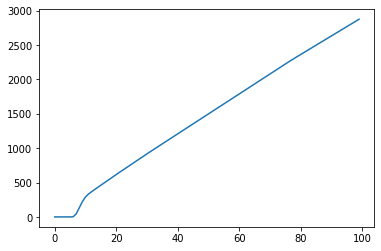

In [54]:
x = []
y = []

for i in range(0, 100):
    x.append(i)
    y.append(len(InAbutNotInB(delta, wuhan, i)))

plt.plot(x,y)

---
**Problem #3:**

Given the count of 9-mers that appear *only* in SARS-COV2Delta from Problem #2, predict both a lower bound and an upper bound on how many 10-mers will appear *only* in SARS-COV2Delta. Then use your function from **Problem #1** to compute the actual number of unique 10-mers. 

---
**Problem #4:**

The Spike gene appears between (21563, 25385) in the SARS-COV2Wuhan strain. Find its location in the SARS-COV2Delta strain.

In [31]:
wuhan[21563: 25385]                         

'ATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAACAGAATCTATTGTTAGATTTCCTAATATTACA

---
**Problem #5:**

Find the sequence of amino-acid residues in the Delta version of SARS-COV2's SPIKE protein. How does its length compare to that of the original Wuhan version?

---

## Instructions for submitting your problem set

When you are ready to submit a version of your problem set, follow the instructions below.

1. Press [Save and Checkpoint] on the *File* menu of your Jupyter notebook.
2. Press the link below, which will take you to a website for submitting your problem set.
3. Choose the ***correct problem set number*** from the pull-down, else you might overwrite an earlier submission.
4. Enter in your onyen and PID in the form provided, then upload your submission.

Click [here to submit](http://csbio.unc.edu/mcmillan/index.py?run=PS.upload) your completed problem set

**Instructions for resubmissions:**

1. You may resubmit as many times as you like before the deadline. 
2. Resubmissions *always* overwrite any earlier submissions. 
3. If you resubmit after the due date, you will be warned of any penalties. 
4. Problem sets will not be regraded.